# Customer Churn Analysis - Descriptive Analytics

## Objective
Explore and understand the characteristics and behaviors of customers who churn versus those who stay.


### Dataset Overview

Dataset is downloaded from the <a href="https://www.kaggle.com/datasets/abdullah0a/telecom-customer-churn-insights-for-analysis">kaggle</a>
- Number of records: `1000`
- Number of features: `10`
- Target variable: `Churn` (Yes/No)

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [17]:
df = pd.read_csv('customer_churn_data.csv')

In [19]:
df.sample(5)

,CustomerID,Age,Gender,Tenure,MonthlyCharges,ContractType,InternetService,TotalCharges,TechSupport,Churn
53,54,51,Male,0,51.74,One-Year,Fiber Optic,0.00,No,Yes
198,199,45,Female,14,89.31,One-Year,Fiber Optic,1250.34,No,Yes
785,786,55,Male,42,51.00,Month-to-Month,NaN,2142.00,No,Yes
253,254,55,Female,1,80.71,One-Year,DSL,80.71,Yes,Yes
991,992,24,Male,32,81.93,Month-to-Month,Fiber Optic,2621.76,Yes,Yes


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CustomerID       1000 non-null   int64  
 1   Age              1000 non-null   int64  
 2   Gender           1000 non-null   object 
 3   Tenure           1000 non-null   int64  
 4   MonthlyCharges   1000 non-null   float64
 5   ContractType     1000 non-null   object 
 6   InternetService  703 non-null    object 
 7   TotalCharges     1000 non-null   float64
 8   TechSupport      1000 non-null   object 
 9   Churn            1000 non-null   object 
dtypes: float64(2), int64(3), object(5)
memory usage: 78.3+ KB


In [23]:
df.isnull().sum()

CustomerID           0
Age                  0
Gender               0
Tenure               0
MonthlyCharges       0
ContractType         0
InternetService    297
TotalCharges         0
TechSupport          0
Churn                0
dtype: int64

In [64]:
# Filling missing data with No record
df['InternetService'] = df["InternetService"].fillna("No record")

In [66]:
df["InternetService"].unique()

array(['Fiber Optic', 'DSL', 'No record'], dtype=object)

In [70]:
# Coonfirming no missing value is now present
df.isnull().sum()

Age                0
Gender             0
Tenure             0
MonthlyCharges     0
ContractType       0
InternetService    0
TotalCharges       0
TechSupport        0
Churn              0
dtype: int64

In [74]:
#checking for duplicate value
df.duplicated().sum()

0

In [76]:
df.describe()

,Age,Tenure,MonthlyCharges,TotalCharges
count,1000.000000,1000.00000,1000.000000,1000.000000
mean,44.674000,18.97300,74.391290,1404.364060
std,9.797741,18.89257,25.712083,1571.755048
min,12.000000,0.00000,30.000000,0.000000
25%,38.000000,5.00000,52.357500,345.217500
50%,45.000000,13.00000,74.060000,872.870000
75%,51.000000,26.00000,96.102500,1900.175000
max,83.000000,122.00000,119.960000,12416.250000


In [95]:
print(f"Churn rate: {df[df['Churn'] == 'Yes'].shape[0]/df.shape[0]}", )

Churn rate: 0.883


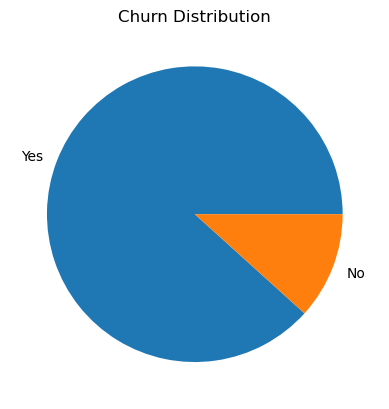

In [89]:
# Pie Chart for Churn
df['Churn'].value_counts().plot(kind='pie', title='Churn Distribution')
plt.ylabel('')
plt.show()

Churn rate of `88.3%` and highly imbalanced data suggests there are a huge amount of customer leaving the services, raising a srious concern, assuming data is randoml selected. Also we need to use techniques like `SMOTE`  and metrics like `F1-score` for dealing with data during mdel training phase

In [78]:
numeric_columns = df.select_dtypes(include=['number'])

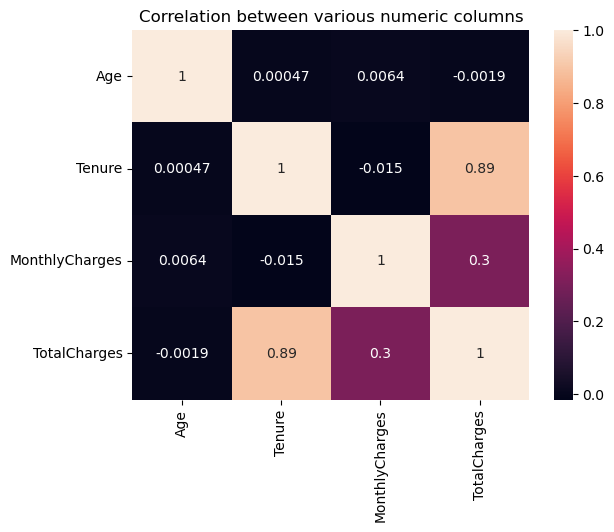

In [84]:
# Correlation between various numeric columns
sns.heatmap(numeric_columns.corr(), annot= True)
plt.title("Correlation between various numeric columns")
plt.show()

Heatmap of correlation between various numeric columns shows that `Tenure` and `TotalCharges` arre highly correlated, possible reason can be greater the person `Tenure` greater will be the `TotalCharges` for him. Also `TotalCharges` also shows a slight positive correlation with `MonthlyCharges`, providing evidence too the claim. 

<Axes: title={'center': 'Average Monthly Charges by Churn'}, xlabel='Churn'>

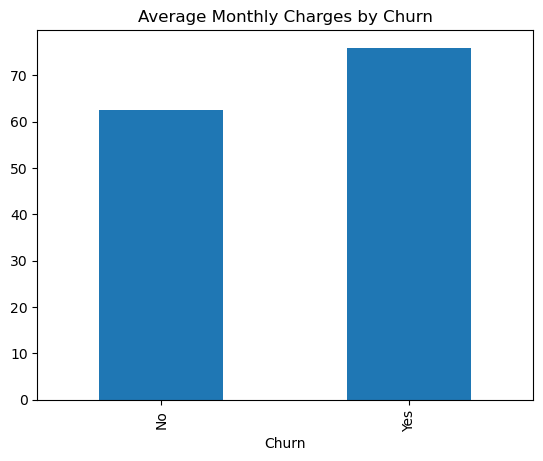

In [100]:
# Average Monthly Charges by Churn
df.groupby('Churn')['MonthlyCharges'].mean().plot(kind='bar', title='Average Monthly Charges by Churn')

<Axes: title={'center': 'Gender wise Churn Distribution'}, xlabel='Churn'>

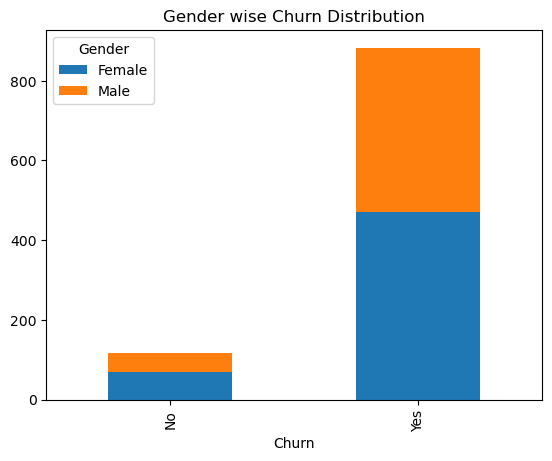

In [98]:
# Gender wise Churn Distribution
df.groupby('Churn')['Gender'].value_counts().unstack().plot(kind='bar', stacked=True, title = "Gender wise Churn Distribution")

<Axes: title={'center': 'Average Monthly Charges by Churn and Gender'}, xlabel='Churn'>

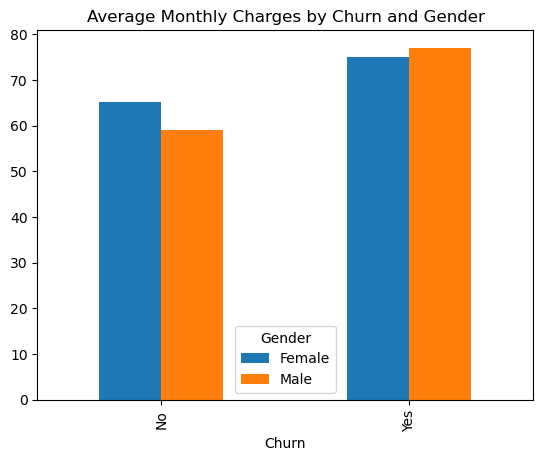

In [43]:
df.groupby(['Churn', 'Gender'])['MonthlyCharges'].mean().unstack().plot(kind='bar', title='Average Monthly Charges by Churn and Gender')

<Axes: title={'center': 'Average Tenure by Churn'}, xlabel='Churn'>

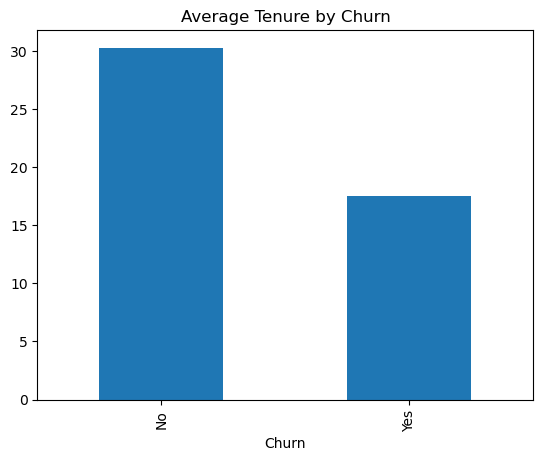

In [45]:
df.groupby('Churn')['Tenure'].mean().plot(kind='bar', title='Average Tenure by Churn')  

<Axes: title={'center': 'Average Age by Churn'}, xlabel='Churn'>

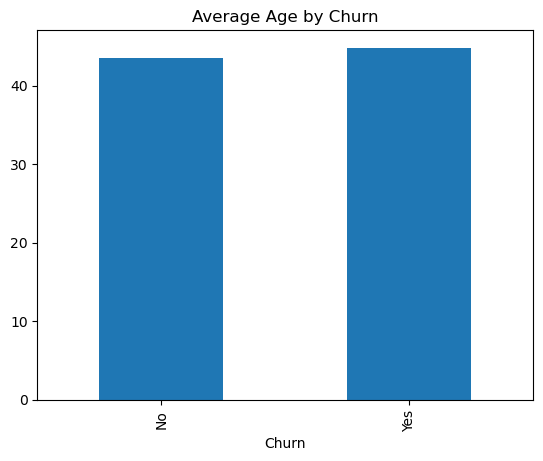

In [46]:
df.groupby('Churn')['Age'].mean().plot(kind='bar', title='Average Age by Churn')

<Axes: title={'center': 'Average Monthly Charges by Contract Type'}, xlabel='ContractType'>

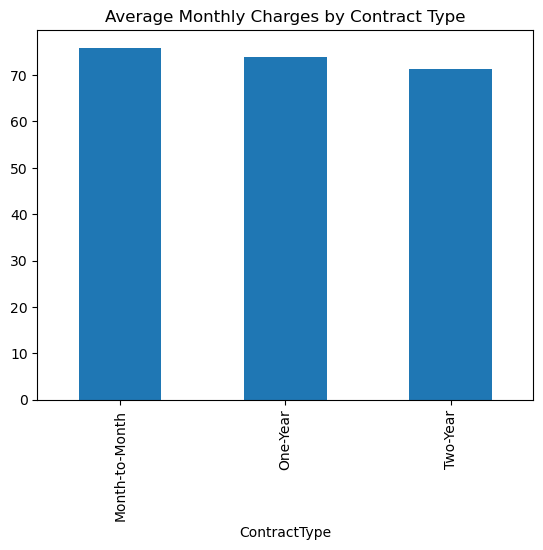

In [48]:
df.groupby('ContractType')['MonthlyCharges'].mean().plot(kind='bar', title='Average Monthly Charges by Contract Type')

<Axes: title={'center': 'Contract Type Distribution by Churn'}, xlabel='Churn'>

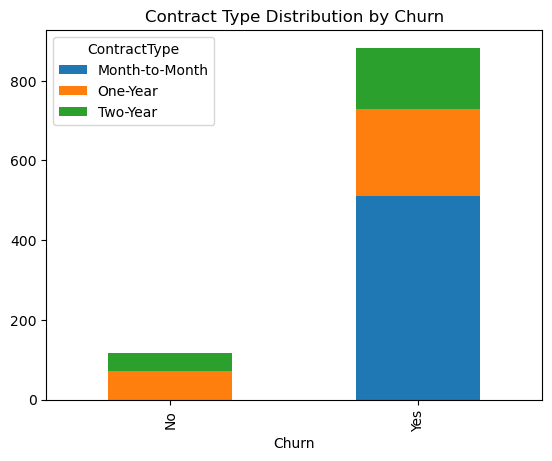

In [50]:
df.groupby('Churn')['ContractType'].value_counts().unstack().plot(kind='bar', stacked=True, title='Contract Type Distribution by Churn')

<Axes: xlabel='Churn', ylabel='count'>

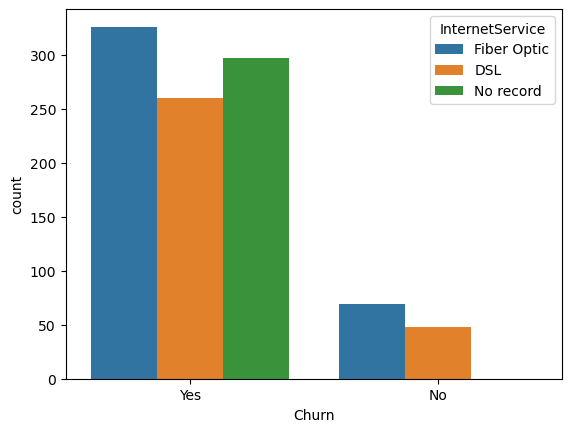

In [52]:
sns.countplot(data=df, x='Churn', hue='InternetService')